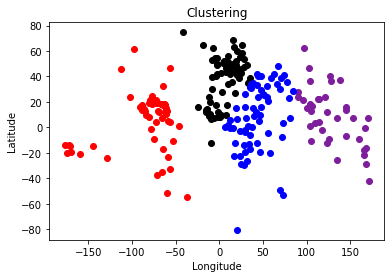

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

csvData = pd.read_csv('Categorical.csv')
df = pd.DataFrame(csvData)

data_size = 1000
num_iters = 50
num_clusters = 4



data =df[['Longitude','Latitude']].to_numpy()


centroids = []
rng = np.random.default_rng(0)

random_indices = rng.choice(data.shape[0],4)
#random.sample(range(data.shape[0]), 4)
for i in random_indices:
    centroids.append(data[i])

assigned_centroids = [0] * len(data)

def compute_l2_distance(x, centroid):
    dist = 0
    
 
    for i in range(len(x)):
        dist += (centroid[i] - x[i])**2
        
    return dist

def get_closest_centroid(x, centroids):
    centroid_distances = []
    
    for centroid in centroids:
        dist = compute_l2_distance(x, centroid)
        centroid_distances.append(dist)
    
    closest_centroid_index =  min(range(len(centroid_distances)), key=lambda x: centroid_distances[x])
    
    return closest_centroid_index

def compute_sse(data, centroids, assigned_centroids):
    sse = 0
    
    for i,x in enumerate(data):
    
        centroid = centroids[assigned_centroids[i]]
                
        
        dist = compute_l2_distance(x, centroid)
        
       
        sse += dist
    
    sse /= len(data)
    return sse


num_centroid_dims = data.shape[1]

sse_list = []


for n in range(num_iters):
    
    
    for i in range(len(data)):
        x = data[i]
        
        
        closest_centroid = get_closest_centroid(x, centroids)
        
        
        assigned_centroids[i] = closest_centroid
    
    
    for c in range(len(centroids)):
        
        cluster_data = [data[i] for i in range(len(data)) if assigned_centroids[i] == c]
    
        
        new_centroid = [0] * len(centroids[0])
        
        
        
        for dim in range(num_centroid_dims): 
            dim_sum = [x[dim] for x in cluster_data]
            dim_sum = sum(dim_sum) / len(dim_sum)
            new_centroid[dim] = dim_sum
            
        
        centroids[c] = new_centroid
        
    
    sse = compute_sse(data, centroids, assigned_centroids)
    sse_list.append(sse)



fig = plt.figure()

color = ['#000000','#7E1E9C','#FF0000','#0000FF']

for c in range(len(centroids)):
        cluster_members = [data[i] for i in range(len(data)) if assigned_centroids[i] == c]  
        #print(cluster_members)
        cluster_members = np.array(cluster_members)
        plt.title('Clustering')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.scatter(cluster_members[:,0], cluster_members[:,1],c=color[c])
        
